In [24]:
%matplotlib inline

import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm
import astropy.visualization as vis
import luptonRGB

In [28]:
data=scipy.io.loadmat("cutouts_threedet_tracklets_303482")
cutouts=data["cutouts"]

print cutouts[21][3]
for i in range(len(cutouts)):
   if cutouts[i][3]!=0:
       print i


[[1]]
0
14
21
33
44
53
56
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
84
85
90
99
110
119
127
129
163
173
174
181
195
197
198
204
206
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
239
246
247
251
264
265
281
283
302
304
305
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
326
327
328
329
330
331
332
333
334
335
336
337
338
339
341
342
345
352
354
356
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
405
408
409
410
411
412
413
414
415
416
417
418
419
420
422
423
424
425
426
427
428
429
430
431
432
434
435
436
437
438
439
441
443
444
445
446
447
448
452
454
464
470
475
476
485
487
526
535
587
588
589
591
592
593
595
596
597
598
599
600
601
602
603
604
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
635
636
645
646
647
648
649
650
651
652
653
654
655


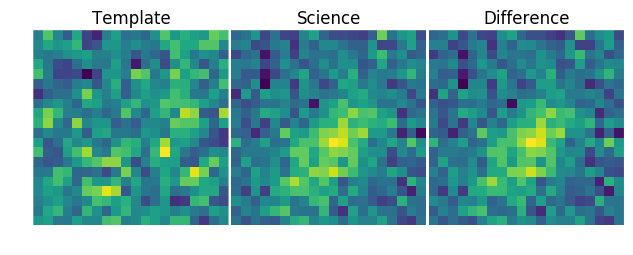

In [29]:
#Scale arrays individually and then concatenate

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
min_cut=0 #-1
Q=5
max_cut=0 #cutouts[8][0].max()
tryRGB=True
template=vis.scale_image(cutouts[8][0],min_cut=min_cut,max_cut=max_cut)
science=vis.scale_image(cutouts[8][1],min_cut=min_cut,max_cut=max_cut)
difference=vis.scale_image(cutouts[8][2],min_cut=min_cut,max_cut=None)

if tryRGB==True:
    template=cutouts[21][0]
    science=cutouts[21][1]
    difference=cutouts[21][2]
    mintemp = template.min()
    minsci = science.min()
    mindiff = difference.min()
    template = luptonRGB.makeRGB(template,Q=Q,minimum=mindiff)
    science = luptonRGB.makeRGB(science,Q=Q,minimum=mindiff)
    difference = luptonRGB.makeRGB(difference,Q=Q,minimum=mindiff)
    
ax1.imshow(template[:,:,0],cmap=cm.viridis,interpolation="none")
ax1.axis('off')
ax2.imshow(science[:,:,0],cmap=cm.viridis,interpolation="none")
ax2.axis('off')
ax3.imshow(difference[:,:,0],cmap=cm.viridis,interpolation="none")
ax3.axis('off')
ax1.set_title("Template")
ax2.set_title("Science")
ax3.set_title("Difference")
plt.tight_layout(pad=-0.5, w_pad=-1.5, h_pad=-1.5)
plt.savefig('sub_sets/test.jpg')

#arcsinh scaling,log,sqrt


20


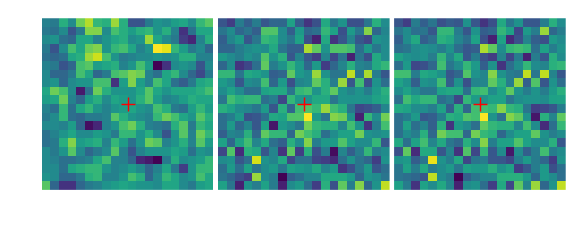

In [84]:
#Concatenate arrays and then scale

template=cutouts[14][0]
science=cutouts[14][1]
difference=cutouts[14][2]

stitched_array=np.concatenate((template,science,difference),axis=1)
minimum = stitched_array.min()
Q=5
scaled=luptonRGB.makeRGB(stitched_array,Q=Q,minimum=minimum)
template=scaled[:,:20,0]
science=scaled[:,20:40,0]
difference=scaled[:,40:,0]
print len(template[1])
cenx=9.5
ceny=9.5

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(template,cmap=cm.viridis,interpolation="none")
ax1.axis('off')
ax1.scatter(cenx,ceny, marker='+', color='r', s=100)
ax2.imshow(science,cmap=cm.viridis,interpolation="none")
ax2.axis('off')
ax2.scatter(cenx,ceny, marker='+',color='r',s=100)
ax3.imshow(difference,cmap=cm.viridis,interpolation="none")
ax3.axis('off')
marker = ax3.scatter(cenx,ceny, marker='+',color='r',s=100)
plt.tight_layout(w_pad=-3)
plt.savefig('sub_sets/test.jpg',bbox_inches='tight')

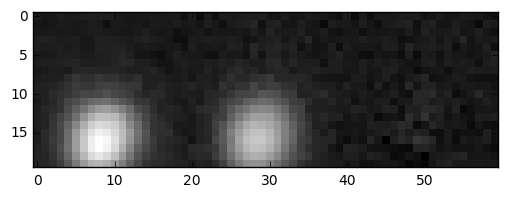

In [8]:
plt.imshow(scaled[:,:,0],cmap=cm.gray,interpolation="none")


In [24]:
scaled[:,:,0]

array([[31, 24, 24, ..., 25, 21, 18],
       [23, 21, 24, ..., 12, 31, 28],
       [25, 26, 27, ..., 31, 21, 18],
       ..., 
       [34, 40, 57, ..., 27, 17, 12],
       [36, 38, 52, ..., 24, 24, 21],
       [38, 39, 45, ..., 28, 25, 26]], dtype=uint8)

In [27]:
luptonRGB.makeRGB?